In [2]:
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [3]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

<Axes: >

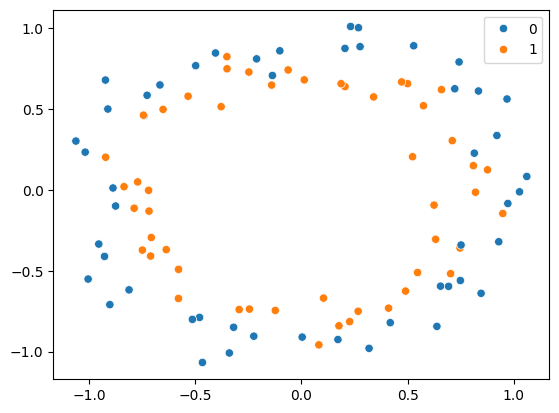

In [5]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [7]:
model = Sequential()

model.add(Input(shape=(2, )))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [8]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, verbose=1)

Epoch 1/1000


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.8133 - loss: 0.5951 - val_accuracy: 0.6000 - val_loss: 0.6782
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8242 - loss: 0.5892 - val_accuracy: 0.6500 - val_loss: 0.6759
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8047 - loss: 0.5871 - val_accuracy: 0.6500 - val_loss: 0.6738
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8133 - loss: 0.5847 - val_accuracy: 0.6000 - val_loss: 0.6735
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8367 - loss: 0.5851 - val_accuracy: 0.5500 - val_loss: 0.6730
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8445 - loss: 0.5856 - val_accuracy: 0.5500 - val_loss: 0.6741
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8742 - loss: 0.5743 - val_accuracy: 0.5500 - val_loss: 0.6748
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8805 - loss: 0.5698 - val_accuracy: 0.5000 - val_loss: 0.67

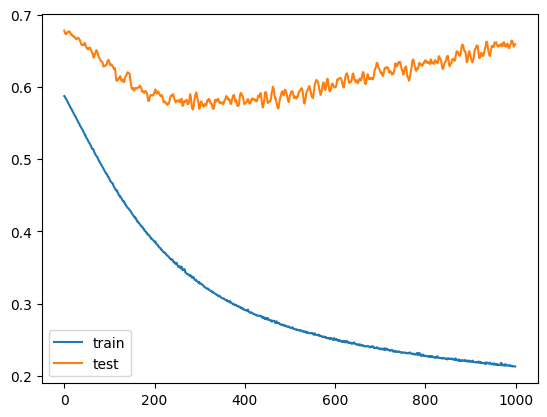

In [11]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 9s 907us/step


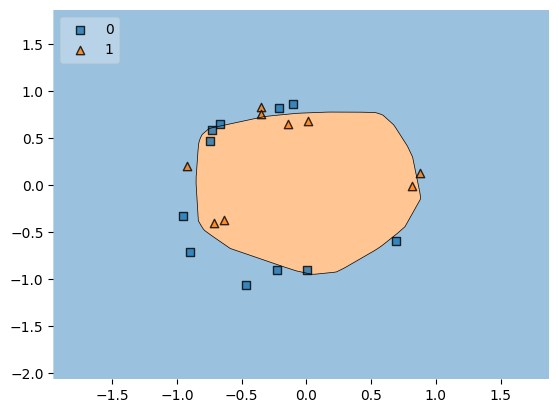

In [12]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()

## Early Stopping

In [25]:
model = Sequential()

model.add(Input(shape=(2, )))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [26]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=30,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=100,
)

In [28]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, callbacks=callback)

Epoch 1/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.4648 - loss: 0.6934 - val_accuracy: 0.5500 - val_loss: 0.6947
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4859 - loss: 0.6885 - val_accuracy: 0.4000 - val_loss: 0.6976
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4672 - loss: 0.6913 - val_accuracy: 0.4000 - val_loss: 0.6980
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4750 - loss: 0.6886 - val_accuracy: 0.4000 - val_loss: 0.6992
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5164 - loss: 0.6872 - val_accuracy: 0.4000 - val_loss: 0.7006
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.5055 - loss: 0.6876 - val_accuracy: 0.4500 - val_loss: 0.7017
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5367 - loss: 0.6863 - val_accuracy: 0.4500 - val_loss: 0.7032
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5164 - loss: 0.6850 - val_accuracy: 0.4500 - v

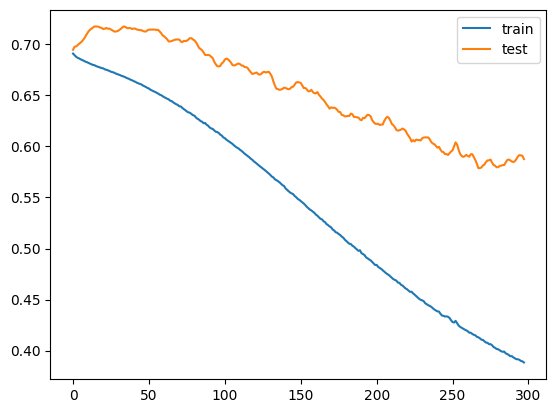

In [29]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


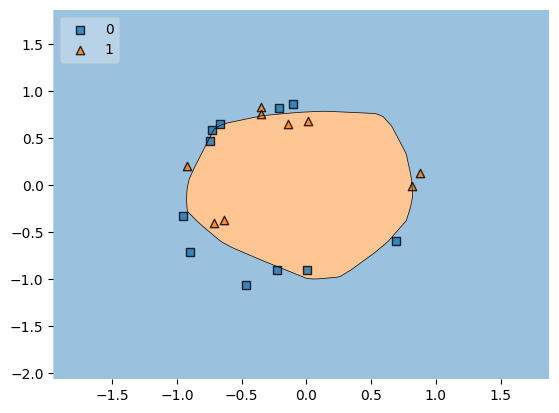

In [30]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()